In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

In [2]:
# Load the dataset
data = pd.read_csv('soil_moisture_data.csv')

In [3]:
# Display the first few rows of the data
print("First few rows of the data:")
print(data.head())

First few rows of the data:
          VV         VH   smap_am  soil_moisture
0  -9.058618 -15.982408  0.284554          0.301
1  -9.511266 -18.085192  0.218601          0.172
2 -10.926619 -19.470199  0.286454          0.485
3  -8.650778 -14.840568  0.407210          0.143
4  -6.633557 -13.470629  0.420252          0.375


In [4]:
# Get an overview of the dataset
print("\nData information:")
print(data.info())


Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30747 entries, 0 to 30746
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   VV             30747 non-null  float64
 1   VH             30747 non-null  float64
 2   smap_am        30747 non-null  float64
 3   soil_moisture  30747 non-null  float64
dtypes: float64(4)
memory usage: 961.0 KB
None


In [5]:
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
VV               0
VH               0
smap_am          0
soil_moisture    0
dtype: int64


In [6]:
# Summary statistics
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
                 VV            VH       smap_am  soil_moisture
count  30747.000000  30747.000000  30747.000000   30747.000000
mean      -9.195999    -16.417307      0.147262       0.412488
std        2.943375      3.413569      0.121603      17.746967
min      -26.670000    -35.349515      0.000000       0.000000
25%      -10.845618    -18.014890      0.071006       0.078000
50%       -9.104179    -15.783631      0.125384       0.174000
75%       -7.631939    -14.171636      0.202437       0.279000
max        5.057968     -4.289361      0.674961    1396.570000



Correlation matrix:


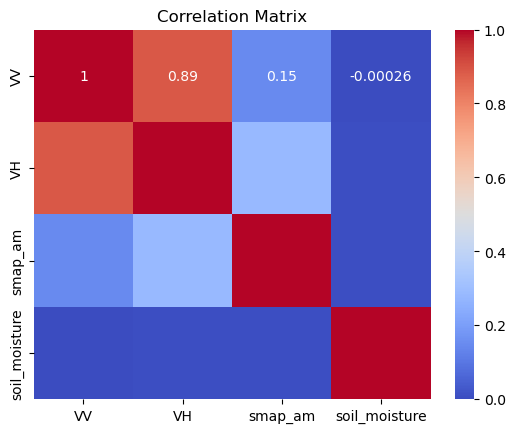

In [7]:
# Explore correlations between variables
print("\nCorrelation matrix:")
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [8]:
# Feature Engineering
# Standardize input features
scaler = StandardScaler()
data[['VV', 'VH', 'smap_am']] = scaler.fit_transform(data[['VV', 'VH', 'smap_am']])

# Round the standardized input features to 3 decimal places
data[['VV', 'VH', 'smap_am']] = data[['VV', 'VH', 'smap_am']].round(3)

# Optional: Round the target variable (soil_moisture) to 3 decimal places for consistency
data['soil_moisture'] = data['soil_moisture'].round(3)

# Check the first few rows of the data after standardization
print("\nFirst few rows of the data after standardization:")
print(data.head())


First few rows of the data after standardization:
      VV     VH  smap_am  soil_moisture
0  0.047  0.127    1.129          0.301
1 -0.107 -0.489    0.587          0.172
2 -0.588 -0.894    1.145          0.485
3  0.185  0.462    2.138          0.143
4  0.871  0.863    2.245          0.375


In [9]:
# Split the data into train and test sets
X = data[['VV', 'VH', 'smap_am']]
y = data['soil_moisture']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Model Training and Evaluation

# Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin_reg = lin_reg.predict(X_test)

In [11]:
# Random Forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [12]:
# Neural Network model
nn = Sequential([
    Input(shape=(X_train.shape[1],)),  # Specify input shape using an Input layer
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)  # Output layer for regression
])
# Compile the model
nn.compile(optimizer=Adam(), loss='mse')

# Train the model
nn.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=0)

# Predict with the model
y_pred_nn = nn.predict(X_test)

# Reshape y_pred_nn to be one-dimensional if necessary
y_pred_nn = y_pred_nn.flatten()

193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step


In [13]:
# Calculate mean squared error and R-squared for each model
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

In [14]:
# Display results
print(f"\nLinear Regression Model Results:")
print(f"MSE: {mse_lin_reg}, R-squared: {r2_lin_reg}")

print(f"\nRandom Forest Model Results:")
print(f"MSE: {mse_rf}, R-squared: {r2_rf}")

print(f"\nNeural Network Model Results:")
print(f"MSE: {mse_nn}, R-squared: {r2_nn}")


Linear Regression Model Results:
MSE: 627.9269430368934, R-squared: 5.780436989299975e-05

Random Forest Model Results:
MSE: 806.6283420907575, R-squared: -0.2845152201094754

Neural Network Model Results:
MSE: 623.2516900230527, R-squared: 0.007502910549246011


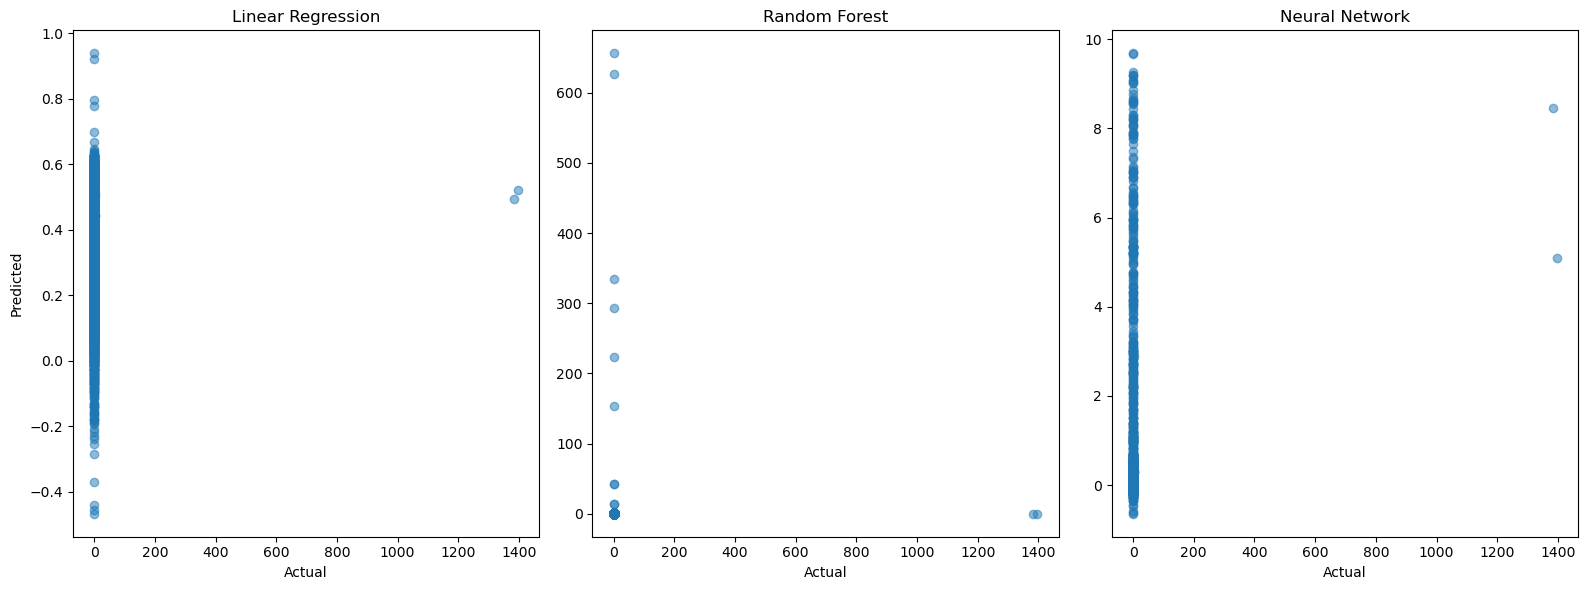

In [15]:
# Plot predicted vs actual values
plt.figure(figsize=(16, 6))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lin_reg, alpha=0.5)
plt.title('Linear Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Random Forest
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.title('Random Forest')
plt.xlabel('Actual')

# Neural Network
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_nn, alpha=0.5)
plt.title('Neural Network')
plt.xlabel('Actual')

plt.tight_layout()
plt.show()

In [16]:
# Calculate the accuracy percentage for each model
# Define the tolerance for the accuracy calculation
tolerance = 0.1  # You can adjust this value as per your requirement

# Calculate the accuracy for each model
accuracy_lin_reg = np.mean(np.abs(y_test - y_pred_lin_reg) <= tolerance) * 100
accuracy_rf = np.mean(np.abs(y_test - y_pred_rf) <= tolerance) * 100
accuracy_nn = np.mean(np.abs(y_test - y_pred_nn) <= tolerance) * 100

# Display the accuracy results
print(f"\nAccuracy percentage for Linear Regression: {accuracy_lin_reg:.2f}%")
print(f"Accuracy percentage for Random Forest: {accuracy_rf:.2f}%")
print(f"Accuracy percentage for Neural Network: {accuracy_nn:.2f}%")


Accuracy percentage for Linear Regression: 22.59%
Accuracy percentage for Random Forest: 52.73%
Accuracy percentage for Neural Network: 43.32%


In [17]:
# Function to predict soil moisture using the trained models
def predict_soil_moisture(VV, VH, smap_am):
    # Standardize the input features using the scaler
    input_data = np.array([[VV, VH, smap_am]])
    input_data_scaled = scaler.transform(input_data)
    
    # Predict using the trained models
    pred_lin_reg = lin_reg.predict(input_data_scaled)[0]  # Get prediction from Linear Regression
    pred_rf = rf.predict(input_data_scaled)[0]  # Get prediction from Random Forest
    pred_nn = nn.predict(input_data_scaled).flatten()[0]  # Get prediction from Neural Network
    
    # Calculate the average prediction of Random Forest and Neural Network models
    avg_rf_nn_prediction = (pred_rf + pred_nn) / 2
    
    # Return the predictions from each model and the average of Random Forest and Neural Network models
    return {
        'Linear Regression': pred_lin_reg,
        'Random Forest': pred_rf,
        'Neural Network': pred_nn,
        'Average RF and NN': avg_rf_nn_prediction  # Add the average prediction of Random Forest and Neural Network
    }

# Example usage: Provide input values for VV, VH, and smap_am
VV_input = float(input("Enter VV: "))
VH_input = float(input("Enter VH: "))
smap_am_input = float(input("Enter smap_am: "))

# Get predictions
predictions = predict_soil_moisture(VV_input, VH_input, smap_am_input)

# Display the predictions and the average of Random Forest and Neural Network
print("\nPredicted soil moisture values:")
print(f"Linear Regression: {predictions['Linear Regression']:.3f}")
print(f"Random Forest: {predictions['Random Forest']:.3f}")
print(f"Neural Network: {predictions['Neural Network']:.3f}")
print(f"Final mean: {predictions['Average RF and NN']:.3f}")  # Print the average prediction of RF and NN models


Enter VV:  -9.5111
Enter VH:  -18.085
Enter smap_am:  0.218


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

Predicted soil moisture values:
Linear Regression: 0.266
Random Forest: 0.189
Neural Network: 0.216
Final mean: 0.202


/Users/charanbhc/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/charanbhc/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/charanbhc/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
